<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Pràctica 1 - Grafs </h2>
</center>
</p>
</div>

<div class="alert alert-danger" style="width:95%; margin:0 auto; padding">
<center><p><h2> ¡¡IMPORTANTE!! </h2></p> </center> 

<p>
Para la realizacón de esta práctica tendréis que utilizar vuestra propia clase `Graph` implementada en la Práctica 0. Si dicha clase no cumple los requisitos funcionales y no pasa los tests, con muy alta probabilidad los tests propuestos para esta práctica tampoco funcionen correctamente. 
</p>
</div>

<div class="alert alert-info">
<center>
  <h1>Introducción</h1>
</center>


A lo largo de esta práctica trabajaremos con el grafo generado a partir de la red de metro de Londres. En este grafo los nodos representan las estaciones y los ejes las vias que van de una estación a otra. Todos los ejes tienen cuatro atributos:

* Linea
* Color
* Nombre (de la linea)
* Distancia


In [1]:
# TODO: Importar grafo de la Práctica0
from util2 import get_subway_graph, draw_subway_graph
from graph1 import Graph


G, lines = get_subway_graph('csv', Graph)
G.edge[1][52]

{'color': '0d6928',
 'distance': 0.014782760229403606,
 'line': 4,
 'name': 'District Line',
 'stripe': 'NULL'}

Los nodos contienen el nombre de la estación, la latitud y longitud a la que está situada la estación, el número de lineas y la zona.

In [2]:
G.node[124]

{'display_name': 'NULL',
 'latitude': 51.5777,
 'longitude': -0.1458,
 'name': 'Highgate',
 'rail': '0',
 'total_lines': 1,
 'zone': 3.0}

Para mas consultas, la información ha sido extraida de Wikimedia Commons:

https://commons.wikimedia.org/wiki/London_Underground_geographic_maps/CSV

# util.py

En este archivo se os facilitan tres funciones que os permitiran cargar y visualizar la red de metro.
```python
"""
Retorna un objeto nx.Graph que corresponde al grafo de la red de metro y un 
diccionario con las lineas del metro
 - location: ruta donde esta almacenado el archivo .csv
 - Klass: la clase Graph que hemos desarrollado en la práctica 0
"""
G, lines = get_subway_graph(location, Klass)

"""
Dibuja el grafo que le pasemos por parametro.
- G: Grafo de la red de metro
- lines: diccionario con la información sobre las lineas del metro
- figsize: parametro opcional que nos permite definir el tamaño de la figura
- show_labels: parametro opcional que nos permite indicar si queremos mostrar los 
    nombres de las estaciones
"""
draw_metro_graph(G, lines, figsize=(10,6), show_labels=False)

```

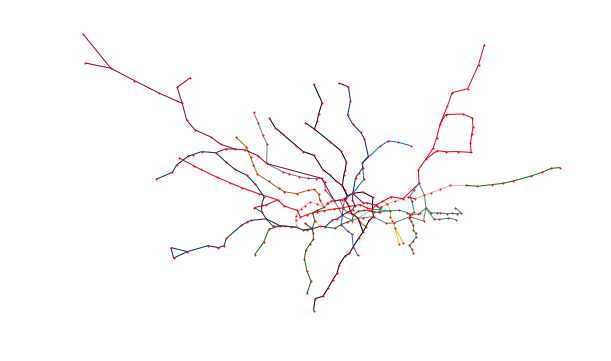

In [76]:
draw_subway_graph(G, lines, figsize=(10,6))

<div class="alert alert-info">
<center>
  <h1>Contenido</h1>
  </center><p>



<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>1- Dijkstra</p></h2>
  
  <p>
 Se propone que hagáis dos implementaciones del algoritmo <a href="https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm">Dijkstra</a>. 
 <ul><li>
 **dijkstra1:** La primera consiste en el algoritmo común en el que tendremos en cuenta las distancias definidas en los edges. 
 </li><li>
 **dijkstra2:** La segunda implementación es simplemente una ampliación del primer algoritmo en el que añadiremos una penalización por cambio de linea.</li>
 </ul>
</p>
<h3> Ejemplo _dijkstra2_</h3>
<p>
Para ilustrar lo que se pide en la práctica veamos como se calcularía el valor de **C** y **D** en el siguiente gráfico:
</p>


<p><center><img src='img/e1.png'></img></center></p>


<p>
<ul><li>
**[C]** Calculamos V(B) como V(A) + d([A,B]), calculamos V(C) como V(B) + d([B,C]), ya hemos acabado.
</li>
<li>
**[D]** Calculamos V(B) como V(A) + d([A,B]), calculamos V(D) como V(B) + d([B,D]), como [A,B] es linea azul y [B,D] es linea verde, añadimos una penalización por el transbordo a la que llamamos **P**. Por lo tanto, al final obtenemos que V(D) = V(B) + d([B,C]) + P
</li>
</ul>

<br>
-**V(X)**: Valor de X
<br>
-**d([X,Y])**: Distancia de X a Y
<br>
-**P**: Penalización por transbordo

</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta práctica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto de tipo `Graph` como el que habéis implementado en la Práctica 0.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso, como indexamos los nodos con el identificador de las paradas de Metro, deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El indice del nodo al que queremos llegar.</li>
<li>__infinity=*(int)*__: Parametro opcional en el que definimos que numero nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
<li>__penalty=*(int)*__: (_Solo necesario para dijkstra2)_ Es un numero entero que corresponde a la penalización que aplicamos al valor de un nodo cuando hay cambio de linea.
</ul>
<br>
<h3>OUTPUT</h3>
El output de la función es un diccionario que contiene los siguientes valores:
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El numero de nodos que se han visitado para encontrar la solución.</li>
<li>__ _'distance'_ __: La distancia del camino mínimo desde el origen hasta el destino (es decir, el valor del nodo destino).
<ul>

</p>
</div>


In [3]:
import heapq
from heapq import heappush, heappop
def dijkstra1(G, origen, destino, infinity=float('inf')):
    
    visited = dict()
    path = []
    distance = dict()
    prev = dict()
    expanded = 0
    
    for iteratornode in G.nodes():
        distance[iteratornode] = infinity
        prev[iteratornode] = None
        visited[iteratornode] = False
    
    path.append((0,origen))
    distance[origen] = 0
    prev[origen] = None
    
    while len(path) != 0:
        
        aux= heappop(path)
        node=aux[1]
        dist = aux[0]
        visited[node]=True
        
        
        if node==destino:
            break
        for x in G.neighbors(node): 
            if visited[x] == False:
                expanded +=1
                if (distance[x] > dist + G.edge[node][x]['distance']):
                    distance[x] = dist + G.edge[node][x]['distance']
                    prev[x] = node
                    heappush(path,(distance[x],x))
        
    path_min = []
    last = destino
    while last != None:
            path_min.append(last)
            last = prev[last]
       
    path_min.reverse()
    
    return {
        'path': path_min,
        'expanded': expanded,
        'distance': distance[destino]
    }
    

In [4]:
dijkstra1(G, 10, 235)

{'distance': 0.31895111263175857,
 'expanded': 334,
 'path': [10,
  128,
  39,
  145,
  89,
  277,
  192,
  107,
  133,
  146,
  236,
  99,
  74,
  17,
  110,
  265,
  1,
  73,
  182,
  194,
  5,
  252,
  251,
  235]}

In [5]:
from util2 import dijkstra_tester
import networkx as nx
dijkstra_tester(1,nx.Graph,dijkstra1,True)


Prueba 0 superada.
Prueba 1 superada.
Prueba 2 superada.
Prueba 3 superada.
Prueba 4 superada.
Prueba 5 superada.
Prueba 6 superada.
Prueba 7 superada.
Prueba 8 superada.
Prueba 9 superada.
Prueba 10 superada.
Prueba 11 superada.
Prueba 12 superada.
Prueba 13 superada.
Prueba 14 superada.
Prueba 15 superada.
Prueba 16 superada.
Prueba 17 superada.
Prueba 18 superada.
Prueba 19 superada.
Prueba 20 superada.
Prueba 21 superada.
Prueba 22 superada.
Prueba 23 superada.
Prueba 24 superada.
Prueba 25 superada.
Prueba 26 superada.
Prueba 27 superada.
Prueba 28 superada.
Prueba 29 superada.
Prueba 30 superada.
Prueba 31 superada.
Prueba 32 superada.
Prueba 33 superada.
Prueba 34 superada.
Prueba 35 superada.
Prueba 36 superada.
Prueba 37 superada.
Prueba 38 superada.
Prueba 39 superada.
Prueba 40 superada.
Prueba 41 superada.
Testeado dijkstra1: 42/42 pruebas superadas. Dijkstra es correcto :D, queda en tus manos que sea eficiente.


COMENTARIOS DIJKSTRA1:

Lo primero que he hecho ha sido importar el grafo de la líbreria. He creado una lista llamada path que luego le he metido una tupla con la distancia y el valor del nodo. También he creado unos cuántos diccionarios cómo: prev que me mira el nodo anterior, visited que me mira si ese nodo en concreto está visitado y luego distancias que me dice todas las distancias de los nodos del metro. A partir del nodo inicial lo vamos recorriendo, visitamos todos sus vecinos y vamos comparando sus distancias, una vez obtenemos la distancia mínima pasamos al siguiente nodo y así succesivamente hasta añadir todo al path. Por último he creado un path_min que me va añadiendo todos los nodos con distancia min y me muestra el path.

La complejidad al hacerlo con listas es de O(|V|^2)  porque en el peor caso, para eliminar deberemos recorrer toda la lista por cada nodo.


In [129]:
import heapq
from heapq import heappush, heappop
def dijkstra2(G, origen, destino, infinity=float('inf'),penalty = 5000000):
    
    visited = dict()
    path = []
    distance = dict()
    prev = dict()
    expanded = 0
    path.append((0,origen))
    lines = dict()
    
    for n in G.nodes():
        llista = []
        for neigh in G.neighbors(n):
            if  G.edge[n][neigh]['line'] not in llista:
                llista.append(G.edge[n][neigh]['line'])
        lines[n]  = llista
    
    for iteratornode in G.nodes():
        for lin in lines[iteratornode]:
            t= (iteratornode,lin)
            distance[t] = infinity
            prev[iteratornode] = None
            visited[iteratornode] = False
    
    for n in lines[origen]:
        distance[(origen,n)] = 0
    
    # nodes[n1]['total_lines']
        
    while len(path) != 0:
        
        aux=heappop(path)
        node=aux[1]
        dist=aux[0]
        visited[node]=True
        
        if node==destino:
            break
        for x in G.neighbors(node):
            for lin in lines[x]:
                for lin2 in lines[node]:
                    if visited[x] == False:
                        expanded +=1
                        if(lin!=lin2):
                            if (distance[(x,lin)] > dist + G.edge[node][x]['distance'] + penalty):
                                distance[(x,lin)] = dist + G.edge[node][x]['distance']+ penalty
                                prev[x] = node
                                heappush(path,(G.edge[node][x]['distance']+penalty,x))
                        elif(lin==lin2):
                            if (distance[(x,lin)] > dist + G.edge[node][x]['distance']):
                                distance[(x,lin)] = dist + G.edge[node][x]['distance']
                                prev[x] = node
                                heappush(path,(G.edge[node][x]['distance'],x))

    path_min = []
    ultimo = destino
    while ultimo is not None:
            path_min.append(ultimo)
            ultimo = prev[ultimo]
       
    path_min.reverse()
    #print(distance)
    dest = G.edge[destino][G.neighbors(destino)[0]]['distance']
    return {
        'path': path_min,
        'expanded': expanded,
        'distance': dest
    }
    

In [130]:
from util2 import get_subway_graph, draw_subway_graph
from graph1 import Graph


G, lines = get_subway_graph('csv', Graph)
dijkstra2(G, 10, 235)

{'distance': 0.022067623342806944,
 'expanded': 725,
 'path': [10,
  128,
  39,
  145,
  223,
  126,
  60,
  151,
  49,
  197,
  192,
  212,
  11,
  163,
  82,
  193,
  18,
  186,
  122,
  74,
  293,
  17,
  110,
  209,
  242,
  265,
  52,
  1,
  73,
  182,
  194,
  5,
  252,
  251,
  235]}

In [118]:
def dijkstra4(G, origen, destino, penalty=5000000, infinity=float('inf')):
    
    nodes = dict()  
    prev = dict()  
    visited  = []  
    
    for iteratornode in G.nodes():  
        prev[iteratornode] = None  
        nodes[iteratornode] = infinity  
    nodes[origen] = 0 
    visited.append(nodes[origen])
    
    
    while nodes: 
        _list_values = list(nodes.values())   
        _min_list_values = _list_values.index(min(_list_values)) 
        _min = (list(nodes.keys())[_min_list_values]) 
        
        if _min == destino: 
            break
            
        visited.append(nodes[_min]) 
        
        if prev[_min] != None:           
            for neigh in G.neighbors(_min): 
                if G.edge[prev[_min]][_min]['line'] == G.edge[_min][neigh]['line']: 
                    if neigh in nodes:                           
                        if   nodes[neigh] > nodes[_min]+G.edge[_min][neigh]['distance']: 
                            nodes[neigh] = nodes[_min]+G.edge[_min][neigh]['distance'] 
                            prev[neigh] = _min 
                        if neigh == destino: 
                            distance = nodes[neigh] 
                else: 
                    if neigh in nodes:                    
                        if   nodes[neigh] > nodes[_min]+G.edge[_min][neigh]['distance'] + penalty:  
                            nodes[neigh] = nodes[_min]+G.edge[_min][neigh]['distance'] + penalty  
                            prev[neigh] = _min  
                    
                        if neigh == destino:  
                            distance = nodes[neigh]  
        else:  
            for x in G.neighbors(_min):  
                nodes[x] = G.edge[origen][x]['distance']  
                prev[x] = origen  
                if x == destino:  
                    distance = nodes[x]  
                                    
        nodes.pop(_min)  
        
    path_min = [] 
    last = destino 
    while last != None: 
            path_min.append(last) 
            last = prev[last] 
       
    path_min.reverse() 
    
    return {
        'path' : path_min,
        'expanded' : len(visited),
        'distance' : distance
    }

In [119]:
from util2 import get_subway_graph, draw_subway_graph
from graph1 import Graph


G, lines = get_subway_graph('csv', Graph)
dijkstra4(G, 10, 235)

{'distance': 0.3249863215971557,
 'expanded': 41,
 'path': [10,
  128,
  39,
  145,
  223,
  126,
  60,
  151,
  197,
  107,
  133,
  146,
  236,
  99,
  74,
  17,
  110,
  265,
  1,
  73,
  182,
  194,
  5,
  252,
  251,
  235]}

In [120]:
from util2 import dijkstra_tester
import networkx as nx
for i in range(0,1000):
    dijkstra_tester(2,nx.Graph,dijkstra4,False)

Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 19/42 pruebas superadas. 
Testeado dijkstra4: 7/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 8/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista



[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 7/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas

  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 6/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista

Testeado dijkstra4: 12/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 19/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 15/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista

Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 7/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 11/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 13/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista

Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el test

  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista

Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 19/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 21/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista

Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista

Testeado dijkstra4: 6/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 8/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 16/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 20/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 17/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 21/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista



[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 15/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 8/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 

  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 10/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista

Testeado dijkstra4: 8/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 19/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 8/42 pruebas superadas. 
Testeado dijkstra4: 19/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 7/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista



[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 7/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas

  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 12/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 21/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista

Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 8/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 16/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 9/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 11/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 18/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 14/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista

Testeado dijkstra4: 20/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 19/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 8/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprue

  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 6/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 19/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 14/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista



[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 10/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista

Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 17/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 8/42 pruebas superadas. 
Testeado dijkstra4: 21/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error ant

  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista



[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 8/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 8/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son 

  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista



[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 15/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista

Testeado dijkstra4: 11/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista



[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista



[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 12/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 11/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 6/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 14/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 7/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 8/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 8/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista

Testeado dijkstra4: 12/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 16/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 21/42 pruebas superadas. 
Testeado dijkstra4: 21/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 7/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista



[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstr

  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.

  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista

Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 19/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 11/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 19/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 7/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 23/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 7/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 8/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 6/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase N

  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)


Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 6/42 pruebas superadas. 


  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 22/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 8/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas sup

  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista



[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 7/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 19/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra

  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 22/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 8/42 pruebas superadas. 
Testeado dijkstra4: 19/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 21/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 21/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 22/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


[ALERTA!!]: Estas usando la clase NetworkX como libreria de

  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'dista

Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 11/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 15/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 19/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 19/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 11/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 9/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 8/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 14/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 15/42 pruebas superadas. 


[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment


Testeado dijkstra4: 15/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 20/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 


  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
Traceback (most recent call last):
  File "C:\Users\Jose Velasco\Documents\util2.py", line 146, in dijkstra_tester
    res = dijkstra_method(G, orig, dest, pena)
  File "<ipython-input-118-a30d521138aa>", line 61, in dijkstra4
    'distance' : distance
UnboundLocalError: local variable 'distance' referenced before assignment




[ALERTA!!]: Estas usando la clase NetworkX como libreria de grafos. Algunas llamadas a esta libreria no son iguales que las que usamos para 'nuestra' libreria Grafos. Comprueba que tu Dijkstra se ejecuta sin error antes de probarlo con el tester.
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 8/42 pruebas superadas. 
Testeado dijkstra4: 18/42 pruebas superadas. 
Testeado dijkstra4: 23/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 14/42 pruebas superadas. 
Testeado dijkstra4: 11/42 pruebas superadas. 
Testeado dijkstra4: 10/42 pruebas superadas. 
Testeado dijkstra4: 16/42 pruebas superadas. 
Testeado dijkstra4: 12/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 
Testeado dijkstra4: 17/42 pruebas superadas. 
Testeado dijkstra4: 13/42 pruebas superadas. 


<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Dijkstra2</h3></p> </center> </div>

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

In [87]:
#En dijkstra2 he modificado varias cosas del dijkstra1 para que funcione pero los máximos test que supera son 23/42.

#He hecho 2 dijkstra, el dijkstra2 que no me acaba de superar ninguna prueba y el dijkstra4 que me supera 23.

#Primero hago un bucle que mientras que el node no este vacio crea una lista de valores para buscar el minimo de nodes.
#Y el valor lo guardamos en _min. Si el algoritmo ha encontrado el camino minimo entonces hace un break y acaba.

#Ahora irá comprobando todas las uniones que hay, si es la misma linea entonces hará lo mismo que dijkstra1 pero si no es la
#misma entonces se le sumará el penalty. Después el otro procedimiento es igual que dijkstra1.

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2- Matriz de distancias</p></h2>
   <p>
 Se propone el desarrollo de un algoritmo que dado un grafo construya una matriz de $V \times V$ (donde $V$ es el número de vértices del grafo) que contenga la distancia mínima de cada vértice al resto. 
</p>

<p></p>

<p>
<b> Nota: </b> Recordad que en Algorítmica Avanzada buscamos la implementación de algoritmos que no solo resuelvan el problema, sino que lo hagan de manera eficiente
</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta práctica la red de metro) sobre el que calcularemos la matriz de distancias. Debe de ser un objeto de tipo `Graph` como el que habéis implementado en la Práctica 0.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>El output de la función es un diccionario cuya clave es un nodo (origen) y el valor es otro diccionario con la forma $\{nodo\_destino: distancia\}$.</li>
    </ul>

</p>
</div>


In [15]:
import heapq
from heapq import heappush, heappop
def dijkstra3(G, origen, infinity=float('inf')):
    
    visited = dict()
    path = []
    distance = dict()
    prev = dict()
    expanded = 0
    
    for iteratornode in G.nodes():
        distance[iteratornode] = infinity
        prev[iteratornode] = None
        visited[iteratornode] = False
    
    path.append((0,origen))
    distance[origen] = 0
    prev[origen] = None
    
    while len(path) != 0:
        
        aux= heappop(path)
        node=aux[1]
        dist = aux[0]
        visited[node]=True
        
        for x in G.neighbors(node):        
            if visited[x] == False:
                expanded +=1
                if (distance[x] > dist + G.edge[node][x]['distance']):
                    distance[x] = dist + G.edge[node][x]['distance']
                    prev[x] = node
                    heappush(path,(distance[x],x))
        
    
    
    return distance
    
    
    

In [16]:
dijkstra3(G, 10, 235)

{1: 0.21132669558431227,
 2: 0.08678518349631034,
 3: 0.08912980515969865,
 4: 0.1549270573454546,
 5: 0.26096453312132695,
 6: 0.5588001907254658,
 7: 0.052695764731000225,
 8: 0.08624830953377821,
 9: 0.07903204281590062,
 10: 0,
 11: 0.0692101191891932,
 12: 0.158790983627832,
 13: 0.07808671745058521,
 14: 0.06331412540827817,
 15: 0.24600388918834598,
 16: 0.28989494401442006,
 17: 0.14352613472526726,
 18: 0.10233381869171204,
 19: 0.2532703925223781,
 20: 0.22505078047566146,
 21: 0.2920967277548046,
 22: 0.08341101541010736,
 23: 0.11032508287828718,
 24: 0.10804059498461346,
 25: 0.08717836845497962,
 26: 0.07638328491101093,
 27: 0.16038583564953462,
 28: 0.06886088097631318,
 29: 0.09538072905770459,
 30: 0.2571430890179681,
 31: 0.06622852767356853,
 32: 0.17340167299528259,
 33: 0.1384789246291091,
 34: 0.14098810622397315,
 35: 0.12861779136403662,
 36: 0.15145004640018173,
 37: 0.26702067857900336,
 38: 0.19788040744596128,
 39: 0.016633348623458187,
 40: 0.0590266824367

In [17]:
def dist_mat(G):
    llista = dict()
    
    for node in G.nodes():
        llista[node]= dijkstra3(G,node)
    print(llista) 

In [18]:
dist_mat(G)

{11: {11: 0, 163: 0.006000833275470941, 212: 0.010530432089900585, 49: 0.037967300617001126, 87: 0.0404411639923731, 197: 0.028298277915611653, 82: 0.01145977090105391, 193: 0.020292097887754608, 84: 0.06696711679941772, 148: 0.05459779992256631, 279: 0.049297799922566166, 113: 0.11309438221856338, 246: 0.13304055979723736, 298: 0.10274788522682791, 114: 0.21254352870538779, 140: 0.19072564613168258, 137: 0.0798419907889325, 206: 0.05920755355405703, 237: 0.17665937441526394, 143: 0.04836135606369225, 159: 0.038448737842455886, 278: 0.03167673666111857, 185: 0.1673809047138569, 281: 0.1549531132769221, 192: 0.019335577429707786, 13: 0.07308374813783874, 156: 0.07906462240897498, 250: 0.06428715788933898, 16: 0.28982225844908543, 91: 0.300518519478059, 173: 0.2797505157994761, 24: 0.1079679094192788, 164: 0.12967411446548902, 28: 0.011395174417265829, 162: 0.020614718874559075, 37: 0.26694799301366867, 158: 0.28394358067634856, 301: 0.24342863928104758, 48: 0.049946655806077996, 126: 0.

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

In [22]:
# COMENTARIOS MATRIZ:
    
#Para este problema he tenido que modificar dijkstra para que solo nos devuelva las distancias, ya que no hace falta que nos 
#muestre ni el path ni el expanded. Una vez modificado dijkstra lo que he hecho es crear un diccionario en le cual iré añadiendo
#todas las distancias de los nodos. Para eso he hecho un recorrido que va por todos los nodos y los va asignando al diccionario en 
#cuestión. Una vez hecho ese proceso lo único que faltaría sería imprimir el diccionario de distancias.

#La complejidad de este programa es O(n) por cada nodo.

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica se podrá realizar en el campus virtual hasta el día __21 de Octubre a las 23:55__. En la tarea que se habilitará en el campus deberéis colgar __el archivo .ipynb__ asi como __el fichero .pyc con vuestra clase grafo__ con los nombres:
</p>
<p>
```
* AA_P1_<apellido1>_<apellido2>_<nombre>.ipynb
* graphs.pyc
```

</p>
<p>
Por ejemplo:
</p>
<p>
```
AA_P1_Doe_Ritchie_John.ipynb
```

</p>
<p>

Es fundamental que el código esté bién comentado y con un análisis de complejidad exhaustivo del algoritmo.
</p>
</div>